In [11]:

import pandas as pd
#unsupervised 

In [5]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- --------------

In [31]:
from mlxtend.frequent_patterns import apriori, association_rules
# Create a DataFrame with binary values for each item
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [32]:
# Load the dataset (header=None since there's no header)
#dataset_path = 'Market_Basket_Optimisation.csv'
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [33]:
# Data Preprocessing
# Transform dataset into a list of transactions
transactions = []
for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != 'nan']
    transactions.append(transaction)

In [34]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [35]:
# Train Apriori Algorithm on the dataset
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [36]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)

In [37]:
# Display the rules
print("Association Rules:")
print(rules)


Association Rules:
                    antecedents      consequents  antecedent support  \
0                     (avocado)  (mineral water)            0.033329   
1                     (burgers)           (eggs)            0.087188   
2                     (burgers)   (french fries)            0.087188   
3                     (burgers)      (green tea)            0.087188   
4                     (burgers)           (milk)            0.087188   
..                          ...              ...                 ...   
157  (spaghetti, mineral water)           (milk)            0.059725   
158      (spaghetti, olive oil)  (mineral water)            0.022930   
159  (olive oil, mineral water)      (spaghetti)            0.027596   
160       (pancakes, spaghetti)  (mineral water)            0.025197   
161   (pancakes, mineral water)      (spaghetti)            0.033729   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.238368  0.011598  

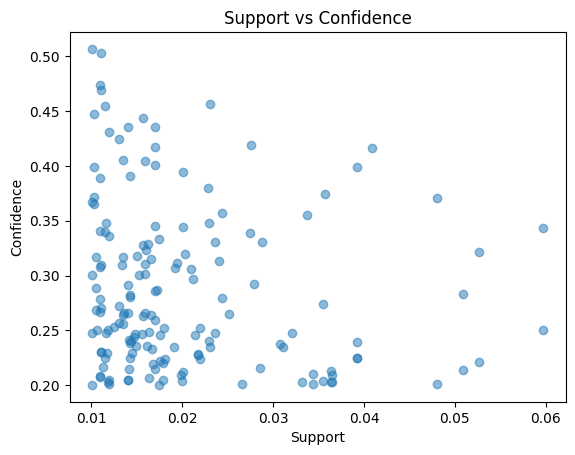

In [38]:
# Visualize the list of rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [39]:
# Modify hyperparameters and observe the changes in rules
# Increase the minimum confidence to 0.5
rules_high_confidence = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [40]:
# Display the rules with high confidence
print("Association Rules with Higher Confidence:")
print(rules_high_confidence)


Association Rules with Higher Confidence:
           antecedents      consequents  antecedent support  \
0  (eggs, ground beef)  (mineral water)            0.019997   
1  (milk, ground beef)  (mineral water)            0.021997   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.238368  0.010132    0.506667  2.125563  0.005365    1.543848   
1            0.238368  0.011065    0.503030  2.110308  0.005822    1.532552   

   zhangs_metric  
0       0.540342  
1       0.537969  


In [41]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Create a simple dataset (toy example)
data = {
    'milk': [1, 1, 1, 0, 0],
    'bread': [1, 1, 0, 1, 1],
    'butter': [0, 1, 1, 1, 1],
    'jam': [0, 1, 0, 0, 1],
    'cereal': [1, 0, 0, 1, 1]
}

# Convert dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("Dataset:")
print(df)

# Apply the Apriori algorithm to find frequent itemsets with minimum support of 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Display the frequent itemsets
print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the rules
print("\nAssociation Rules:")
print(rules)


Dataset:
   milk  bread  butter  jam  cereal
0     1      1       0    0       1
1     1      1       1    1       0
2     1      0       1    0       0
3     0      1       1    0       1
4     0      1       1    1       1

Frequent Itemsets:
   support         itemsets
0      0.6           (milk)
1      0.8          (bread)
2      0.8         (butter)
3      0.6         (cereal)
4      0.6  (butter, bread)
5      0.6  (cereal, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 0.8      0.6   
1     (bread)    (butter)                 0.8                 0.8      0.6   
2    (cereal)     (bread)                 0.6                 0.8      0.6   
3     (bread)    (cereal)                 0.8                 0.6      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     

C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
